# KNN : K - Nearest Neighbors

In [46]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

features = df.drop(columns=['Outcome'])
label = df['Outcome'].values

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
#import Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Create model with k=3
model = KNeighborsClassifier(n_neighbors=3)

# Training the Decision Tree - Can split the data here for training
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=4, stratify=label)

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output for 0:Overcast, 2:Mild
y_pred = model.predict(x_test)

In [49]:
#check accuracy of our model on the test data
print("Accuracy: %.2f%%" % (model.score(x_test, y_test)*100.0))

Accuracy: 62.99%


<b>K-Fold Cross-Validation

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

model_kfold = KNeighborsClassifier(n_neighbors=3)
results_kfold = model_selection.cross_val_score(model_kfold, features, label, cv=5)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 71.36%


In [51]:
#print each cv score (accuracy) and average them
print(results_kfold)
print('cv_scores mean:{}'.format(np.mean(results_kfold)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


<b>Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test) #make prediction on test set

# confusion matrix
matrix = confusion_matrix(y_test,y_pred, labels=[0,1])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[64 36]
 [21 33]]


<b> Performance Metrics

In [53]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 64 36 21 33


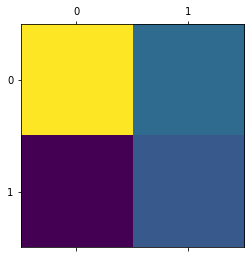

In [54]:
import matplotlib.pyplot as plt

plt.matshow(matrix)

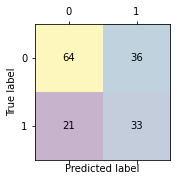

In [55]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(matrix, alpha=0.3)
#ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i, s=matrix[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [56]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(y_test, y_pred, target_names=target_names))              

              precision    recall  f1-score   support

     class 0       0.75      0.64      0.69       100
     class 1       0.48      0.61      0.54        54

    accuracy                           0.63       154
   macro avg       0.62      0.63      0.61       154
weighted avg       0.66      0.63      0.64       154



<b>ROC/AUC

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

model_probs = model.predict_proba(x_test)
model_probs = model_probs[:,1]

model_auc = roc_auc_score(y_test, model_probs)
print('ROC AUC= ', model_auc)


ROC AUC=  0.6659259259259259


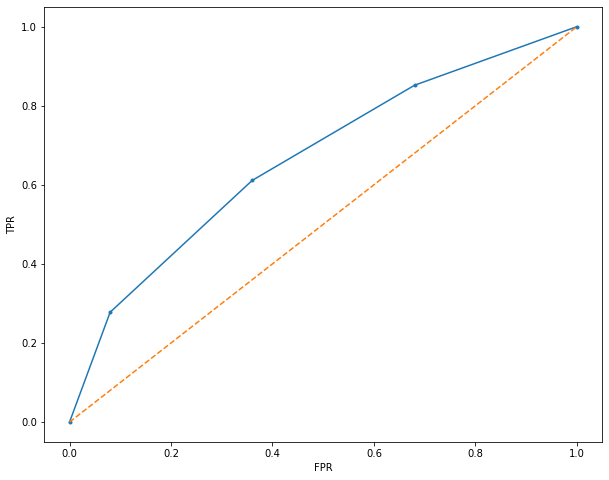

In [58]:
fpr, tpr, _ = roc_curve(y_test, model_probs)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()